## Loading Libraries and Data

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import nltk

In [3]:
%matplotlib inline

In [4]:
train  = pd.read_csv('https://datahack-prod.s3.amazonaws.com/train_file/train_E6oV3lV.csv')

In [5]:
test=pd.read_csv("https://datahack-prod.s3.amazonaws.com/test_file/test_tweets_anuFYb8.csv")

In [6]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [7]:
train.shape

(31962, 3)

In [8]:
test.shape

(17197, 2)

# Data Cleaning

Combining the datasets will make it convenient for us to preprocess the data. Later we will split it back into train and test data.

In [9]:
data = train.append(test, ignore_index=True)

In [10]:
import re

Given below is a user-defined function to remove unwanted text patterns from the tweets.

In [11]:
def remove_twitter_handle(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt  

1. Removing Twitter Handles (@user)

In [12]:
data['cleaned_tweet'] = np.vectorize(remove_twitter_handle)(data['tweet'], "@[\w]*")

2.Removing Punctuations, Numbers, and Special Characters

In [13]:
data['cleaned_tweet'] = data['cleaned_tweet'].str.replace("[^a-zA-Z#]", " ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [14]:
data.head()

,id,label,tweet,cleaned_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


3. Removing Short Words

In [15]:
data['cleaned_tweet'] = data['cleaned_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [16]:
data.head()

,id,label,tweet,cleaned_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


4. Text Normalization

Here we will use nltk’s WordNetLemmatizer() function to normalize the tweets. But before that, we will have to tokenize the tweets. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [17]:
tokenized_tweet = data['cleaned_tweet'].apply(lambda x: x.split())

In [18]:
tokenized_tweet

0        [when, father, dysfunctional, selfish, drags, ...
1        [thanks, #lyft, credit, cause, they, offer, wh...
2                                  [bihday, your, majesty]
3                         [#model, love, take, with, time]
4                       [factsguide, society, #motivation]
                               ...                        
49154    [thought, factory, left, right, polarisation, ...
49155    [feeling, like, mermaid, #hairflip, #neverread...
49156    [#hillary, #campaigned, today, #ohio, used, wo...
49157    [happy, work, conference, right, mindset, lead...
49158    [song, glad, free, download, #shoegaze, #newmu...
Name: cleaned_tweet, Length: 49159, dtype: object

Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words

In [19]:
from nltk.stem import WordNetLemmatizer

In [20]:
lemmatizer = WordNetLemmatizer()

In [21]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [22]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [23]:
tokenized_tweet = tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])

In [24]:
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drag, k...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: cleaned_tweet, dtype: object

In [25]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

data['cleaned_tweet'] = tokenized_tweet

## Visualization from Tweets

Understanding the common words used in the tweets: WordCloud

A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

Let’s visualize all the words our data using the wordcloud plot.

In [26]:
all_words = ' '.join([text for text in data['cleaned_tweet']])

In [27]:
from wordcloud import WordCloud

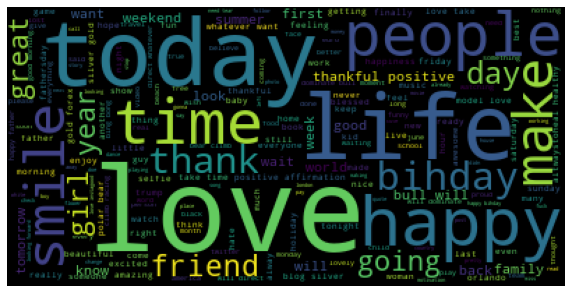

In [28]:
wordcloud=WordCloud().generate(all_words)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Words in non racist/sexist tweets

In [29]:
normal_words =' '.join([text for text in data['cleaned_tweet'][data['label'] == 0]])

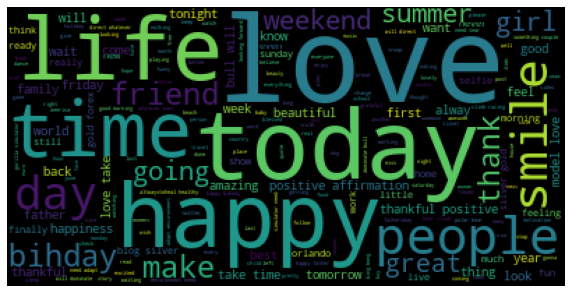

In [30]:
wordcloud=WordCloud().generate(normal_words)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Racist/Sexist Tweets

In [31]:
negative_words = ' '.join([text for text in data['cleaned_tweet'][data['label'] == 1]])

In [32]:
negative_words

'#cnn call #michigan middle school build wall chant #tcot comment #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins retweet agree lumpy say prove lumpy unbelievable that century need something like this again #neverump #xenophobia let fight against #love #peace white establishment have folx running around loving themselves promoting greatness white people call people white #race #identity #med #altright us insecurity lure into #whitesupremacy interested #linguistics that doesn address #race racism about #power #raciolinguistics brings mocked obama being black #brexit #people aren protesting #trump because #republican they because trump fuhered when call #michelleobama gorilla because racist have long thought black people smaller hand show barry probably lied about being #knicks game sucked more than #golf point finger million pointed right back #jewishsupremacist might libtard #libtard #sjw #liberal #politics take #trash america voted against #hate vote

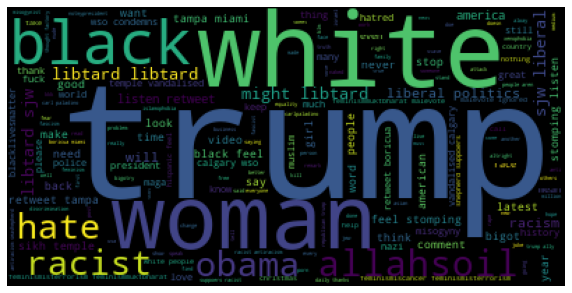

In [33]:
wordcloud=WordCloud().generate(negative_words)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Understanding the impact of Hashtags on tweets sentiment

Hashtags in twitter are synonymous with the ongoing trends on twitter at any particular point in time. We should try to check whether these hashtags add any value to our sentiment analysis task

In [34]:
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

We will store all the trend terms in two separate lists — one for non-racist/sexist tweets and the other for racist/sexist tweets.


In [35]:
HT_normal = hashtag_extract(data['cleaned_tweet'][data['label'] == 0])

In [36]:
HT_normal

[['run'],
 ['lyft', 'disapointed', 'getthanked'],
 [],
 ['model'],
 ['motivation'],
 ['allshowandnogo'],
 [],
 ['school',
  'exams',
  'hate',
  'imagine',
  'actorslife',
  'revolutionschool',
  'girl'],
 ['allin', 'cavs', 'champions', 'cleveland', 'clevelandcavaliers'],
 [],
 ['ireland', 'blog', 'silver', 'gold', 'forex'],
 ['orlando',
  'standwithorlando',
  'pulseshooting',
  'orlandoshooting',
  'biggerproblems',
  'selfish',
  'heabreaking',
  'values',
  'love'],
 ['gettingfed'],
 ['got', 'junior', 'yugyoem', 'omg'],
 ['thankful', 'positive'],
 ['friday', 'cookies'],
 [],
 ['euro'],
 ['badday', 'coneofshame', 'cats', 'pissed', 'funny', 'laughs'],
 ['wine', 'weekend'],
 ['tgif', 'gamedev', 'indiedev', 'indiegamedev', 'squad'],
 ['upsideofflorida', 'shopalyssas', 'love'],
 ['smiles', 'media', 'pressconference', 'antalya', 'turkey', 'throwback'],
 ['ica'],
 [],
 ['rip', 'orlando'],
 [],
 ['alohafriday', 'time', 'not', 'exist', 'positivevibes', 'hawaiian'],
 [],
 ['goodnight', 'badm

In [37]:
HT_negative = hashtag_extract(data['cleaned_tweet'][data['label'] == 1])

In [38]:
HT_negative

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphins',
  'thecove',
  'helpcovedolphins'],
 [],
 [],
 ['neverump', 'xenophobia'],
 ['love', 'peace'],
 [],
 ['race', 'identity', 'med'],
 ['altright', 'whitesupremacy'],
 ['linguistics', 'race', 'power', 'raciolinguistics'],
 ['brexit'],
 ['people', 'trump', 'republican'],
 ['michelleobama'],
 ['knicks', 'golf'],
 ['jewishsupremacist'],
 ['libtard', 'sjw', 'liberal', 'politics'],
 ['trash', 'hate'],
 [],
 [],
 ['stereotyping', 'prejudice', 'hope', 'hate', 'conflict'],
 ['pols', 'bluelivesmatter', 'draintheswamp', 'ferguson'],
 [],
 ['antisemitism', 'hocoschools', 'columbiamd', 'hocomd'],
 ['nazi', 'hatred', 'bigotry'],
 ['libtard', 'sjw', 'liberal', 'politics'],
 ['fyi', 'tcot'],
 ['topoli'],
 ['blacklivesmatter'],
 ['ushistory', 'eugenics'],
 ['biherism', 'bigotry', 'altright', 'potus', 'theresistance'],
 ['crime', 'officer'],
 [],
 ['black', 'retweet', 'tampa', 'miami'],
 ['allahsoil'],
 []

In [39]:
HT_normal = sum(HT_normal,[])

In [40]:
HT_normal

['run',
 'lyft',
 'disapointed',
 'getthanked',
 'model',
 'motivation',
 'allshowandnogo',
 'school',
 'exams',
 'hate',
 'imagine',
 'actorslife',
 'revolutionschool',
 'girl',
 'allin',
 'cavs',
 'champions',
 'cleveland',
 'clevelandcavaliers',
 'ireland',
 'blog',
 'silver',
 'gold',
 'forex',
 'orlando',
 'standwithorlando',
 'pulseshooting',
 'orlandoshooting',
 'biggerproblems',
 'selfish',
 'heabreaking',
 'values',
 'love',
 'gettingfed',
 'got',
 'junior',
 'yugyoem',
 'omg',
 'thankful',
 'positive',
 'friday',
 'cookies',
 'euro',
 'badday',
 'coneofshame',
 'cats',
 'pissed',
 'funny',
 'laughs',
 'wine',
 'weekend',
 'tgif',
 'gamedev',
 'indiedev',
 'indiegamedev',
 'squad',
 'upsideofflorida',
 'shopalyssas',
 'love',
 'smiles',
 'media',
 'pressconference',
 'antalya',
 'turkey',
 'throwback',
 'ica',
 'rip',
 'orlando',
 'alohafriday',
 'time',
 'not',
 'exist',
 'positivevibes',
 'hawaiian',
 'goodnight',
 'badmonday',
 'taylorswift',
 'travelingram',
 'dalat',
 'ri

In [41]:
HT_negative = sum(HT_negative,[])

In [42]:
HT_negative

['cnn',
 'michigan',
 'tcot',
 'australia',
 'opkillingbay',
 'seashepherd',
 'helpcovedolphins',
 'thecove',
 'helpcovedolphins',
 'neverump',
 'xenophobia',
 'love',
 'peace',
 'race',
 'identity',
 'med',
 'altright',
 'whitesupremacy',
 'linguistics',
 'race',
 'power',
 'raciolinguistics',
 'brexit',
 'people',
 'trump',
 'republican',
 'michelleobama',
 'knicks',
 'golf',
 'jewishsupremacist',
 'libtard',
 'sjw',
 'liberal',
 'politics',
 'trash',
 'hate',
 'stereotyping',
 'prejudice',
 'hope',
 'hate',
 'conflict',
 'pols',
 'bluelivesmatter',
 'draintheswamp',
 'ferguson',
 'antisemitism',
 'hocoschools',
 'columbiamd',
 'hocomd',
 'nazi',
 'hatred',
 'bigotry',
 'libtard',
 'sjw',
 'liberal',
 'politics',
 'fyi',
 'tcot',
 'topoli',
 'blacklivesmatter',
 'ushistory',
 'eugenics',
 'biherism',
 'bigotry',
 'altright',
 'potus',
 'theresistance',
 'crime',
 'officer',
 'black',
 'retweet',
 'tampa',
 'miami',
 'allahsoil',
 'praised',
 'cleveland',
 'rnc',
 'white',
 'tamirrice

Non-Racist/Sexist Tweets

In [43]:
a = nltk.FreqDist(HT_normal)

In [44]:
a

FreqDist({'run': 34,
          'lyft': 2,
          'disapointed': 1,
          'getthanked': 2,
          'model': 365,
          'motivation': 168,
          'allshowandnogo': 1,
          'school': 27,
          'exams': 6,
          'hate': 25,
          'imagine': 3,
          'actorslife': 8,
          'revolutionschool': 1,
          'girl': 179,
          'allin': 4,
          'cavs': 12,
          'champions': 4,
          'cleveland': 9,
          'clevelandcavaliers': 1,
          'ireland': 18,
          'blog': 346,
          'silver': 300,
          'gold': 301,
          'forex': 265,
          'orlando': 238,
          'standwithorlando': 2,
          'pulseshooting': 11,
          'orlandoshooting': 59,
          'biggerproblems': 1,
          'selfish': 3,
          'heabreaking': 14,
          'values': 4,
          'love': 1596,
          'gettingfed': 1,
          'got': 9,
          'junior': 1,
          'yugyoem': 1,
          'omg': 27,
          'thankful': 49

In [45]:
dataframe= pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())})

In [46]:
dataframe

,Hashtag,Count
0,run,34
1,lyft,2
2,disapointed,1
3,getthanked,2
4,model,365
...,...,...
20744,kamp,1
20745,ucsd,1
20746,berlincitygirl,1
20747,genf,1


In [47]:
dataframe=dataframe.sort_values(by=["Count"],ascending=False)

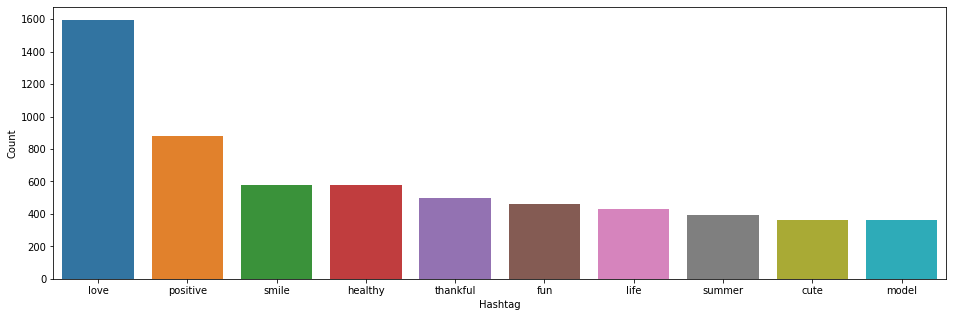

In [48]:
plt.figure(figsize=(16,5))
ax = sns.barplot(data=dataframe.head(10), x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

Racist/Sexist Tweets

In [49]:
b = nltk.FreqDist(HT_negative)

In [50]:
b

FreqDist({'cnn': 10,
          'michigan': 2,
          'tcot': 14,
          'australia': 6,
          'opkillingbay': 5,
          'seashepherd': 22,
          'helpcovedolphins': 3,
          'thecove': 4,
          'neverump': 8,
          'xenophobia': 12,
          'love': 11,
          'peace': 8,
          'race': 14,
          'identity': 1,
          'med': 1,
          'altright': 18,
          'whitesupremacy': 6,
          'linguistics': 1,
          'power': 2,
          'raciolinguistics': 1,
          'brexit': 27,
          'people': 11,
          'trump': 136,
          'republican': 11,
          'michelleobama': 8,
          'knicks': 1,
          'golf': 1,
          'jewishsupremacist': 1,
          'libtard': 76,
          'sjw': 74,
          'liberal': 75,
          'politics': 95,
          'trash': 1,
          'hate': 33,
          'stereotyping': 1,
          'prejudice': 3,
          'hope': 5,
          'conflict': 1,
          'pols': 1,
          'bluel

In [51]:
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})

In [52]:
e=e.sort_values(by=["Count"],ascending=False)

In [53]:
e

,Hashtag,Count
22,trump,136
31,politics,95
63,allahsoil,92
28,libtard,76
30,liberal,75
...,...,...
301,womenonly,1
958,stories,1
957,fabricate,1
956,paid,1


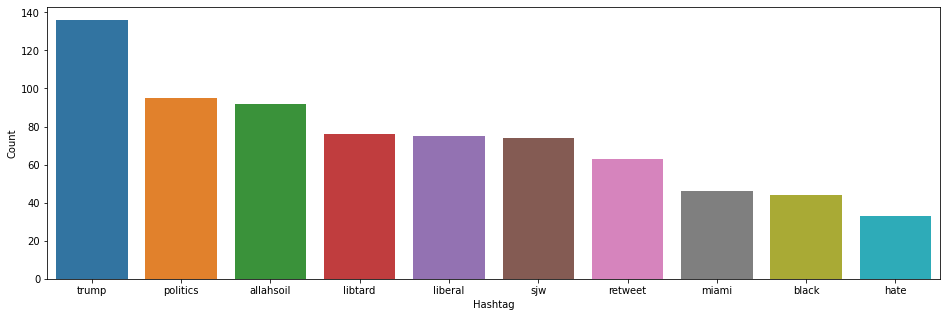

In [54]:
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e.head(10), x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

## Extracting Features from Cleaned Tweets
To analyze a preprocessed data, it needs to be converted into features. Depending upon the usage, text features can be constructed using assorted techniques – Bag-of-Words, TF-IDF

In [55]:
import string
from nltk.corpus import stopwords

## Bag-of-Words Features
Bag-of-Words is a method to represent text into numerical features.

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(data['cleaned_tweet'])

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  app.launch_new_instance()


In [58]:
from sklearn.metrics import classification_report
print (classification_report(yvalid, prediction_int))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8905
           1       0.62      0.43      0.50       684

    accuracy                           0.94      9589
   macro avg       0.79      0.70      0.74      9589
weighted avg       0.93      0.94      0.94      9589



# TF-IDF Features
This is another method which is based on the frequency method but it is different to the bag-of-words approach in the sense that it takes into account, not just the occurrence of a word in a single tweet but in the entire corpus.

TF-IDF works by penalizing the common words by assigning them lower weights while giving importance to words which are rare in the entire corpus but appear in good numbers in few documents.

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(data['cleaned_tweet'])

## Model Building

Building model using TF-IDF features

Logistic Regression

In [60]:
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf, xvalid_tfidf, ytrain, yvalid = train_test_split(train_tfidf, train['label'], random_state=42, test_size=0.3)

lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


0.5076507650765076

In [62]:
from sklearn.metrics import classification_report,accuracy_score
print (classification_report(yvalid, prediction_int))
print("Accuracy : ",accuracy_score(yvalid,prediction_int))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8905
           1       0.66      0.41      0.51       684

    accuracy                           0.94      9589
   macro avg       0.81      0.70      0.74      9589
weighted avg       0.94      0.94      0.94      9589

0.9429554698091563


Decision Tree

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
decision_tree=DecisionTreeClassifier()

In [66]:
decision_tree.fit(xtrain_tfidf,ytrain)

DecisionTreeClassifier()

In [67]:
decision_tree_prediction=decision_tree.predict(xvalid_tfidf)

In [68]:
print("Accuracy : ",accuracy_score(yvalid,decision_tree_prediction))

Accuracy :  0.9392011680050057


Logistic Regression

In [70]:
lreg_model=lreg.fit(xtrain_tfidf,ytrain)

In [71]:
lreg_prediction=lreg_model.predict(xvalid_tfidf)

In [72]:
print("Accuracy : ",accuracy_score(yvalid,lreg_prediction))

Accuracy :  0.9445197622275524


Naive Bayes

In [75]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb_model=mnb.fit(xtrain_tfidf, ytrain)
mnb_prediction = mnb_model.predict(xvalid_tfidf)
print("Accuracy : ",accuracy_score(yvalid,mnb_prediction))

Accuracy :  0.9437897590989676


Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
random_forest_model=RandomForestClassifier()

In [78]:
random_forest_model.fit(xtrain_tfidf,ytrain)

RandomForestClassifier()

In [79]:
random_forest_prediction=random_forest_model.predict(xvalid_tfidf)

In [80]:
print("Accuracy : ",accuracy_score(yvalid,random_forest_prediction))

Accuracy :  0.9453540515173636


Support Vector Machine

In [83]:
from sklearn.svm import SVC  
SVC_model = SVC()  
SVC_model.fit(xtrain_tfidf, ytrain)  

SVC()

In [84]:
SVC_prediction=SVC_model.predict(xvalid_tfidf)

In [85]:
print("Accuracy : ",accuracy_score(yvalid,SVC_prediction))

Accuracy :  0.9458754823234957


Support vector classifier is giving slightly more accuracy than other classifier algorithms

In [125]:
SVC_test_prediction=SVC_model.predict(test_tfidf)

In [124]:
test["tweet"][1]

' @user #white #supremacists want everyone to see the new â\x80\x98  #birdsâ\x80\x99 #movie â\x80\x94 and hereâ\x80\x99s why  '

Here we can see the Racist/Sexist Tweet .
 

Now we will check whether our model predicts correctly or not

In [127]:
print("This tweet is Racist :",SVC_test_prediction[1]==1)

This tweet is Racist : True


Our model predicted the outcome correctly.